In [1]:
setwd('/import/DB/workdir/cd40/')

In [2]:
data1 = readRDS('/import/194.data/data/singledata/heart2/macro.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [4]:
table(data1$seurat_clusters)


   0    1    2    3    4    5    6    7    8 
2959 2705 1785 1538 1415  458  276  206  135 

In [7]:
immune.combined = data1

In [8]:
ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 20, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.5)

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1910 anchors

Filtering anchors

	Retained 1408 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2387 anchors

Filtering anchors

	Retained 889 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4379 anchors

Filtering anchors

	Retained 1889 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 2225 anchors

Filtering anchors

	Retained 1082 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 4032 anchors

Filtering anchors

	Retained 2724 anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 9949 anchors

Filtering anchors

	Retained 5455 anchors

Merging dataset 2 into 4

Extracting anchors for merged samples

Finding integration vector

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 11477
Number of edges: 388320

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 16
Elapsed time: 2 seconds


In [11]:
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
immune.combined = testAB.integrated

Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
07:45:24 UMAP embedding parameters a = 0.9922 b = 1.112

07:45:24 Read 11477 rows and found 20 numeric columns

07:45:24 Using Annoy for neighbor search, n_neighbors = 30

07:45:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

07:45:25 Writing NN index file to temp file /tmp/RtmpGZ5TT4/file254573e4fc930

07:45:25 Searching Annoy index using 1 thread, search_k = 3000

07:45:28 Annoy recall = 100%

07:45:28 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

In [12]:
library(Seurat)

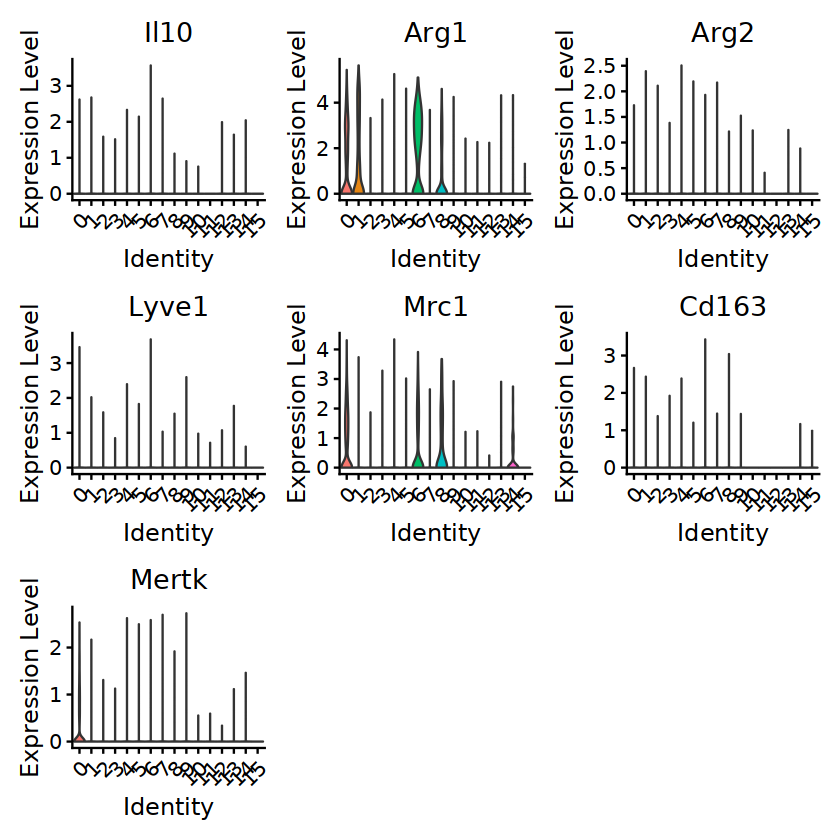

In [13]:
DefaultAssay(immune.combined) = 'RNA'
Idents(immune.combined) = 'seurat_clusters'
VlnPlot(immune.combined,features = c('Il10','Arg1','Arg2','Lyve1','Mrc1','Cd163','Mertk'),pt.size = 0)

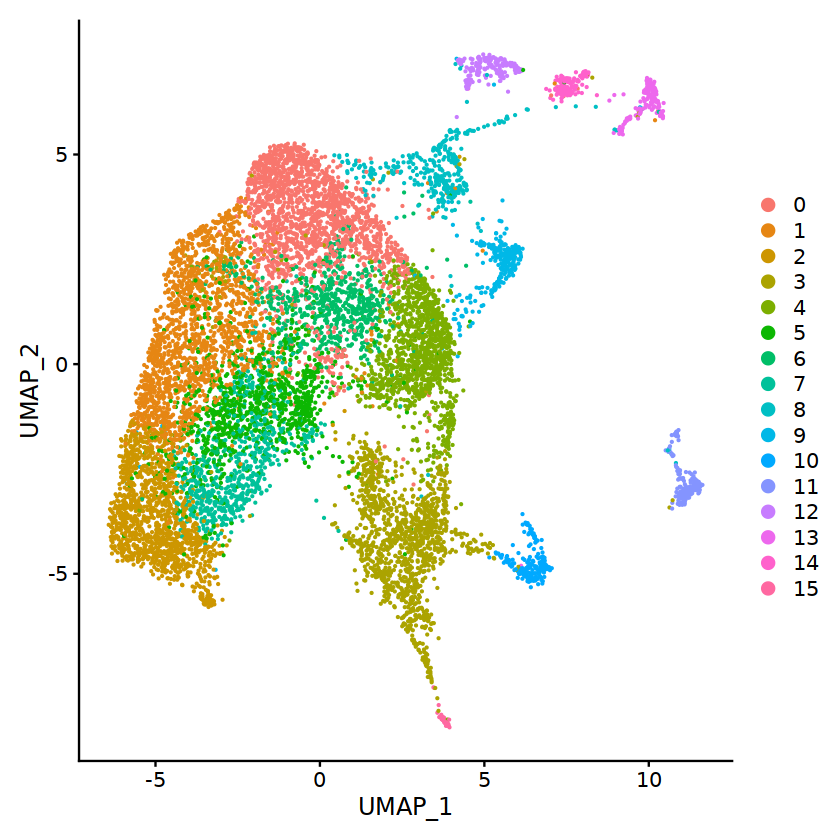

In [14]:
DimPlot(immune.combined)

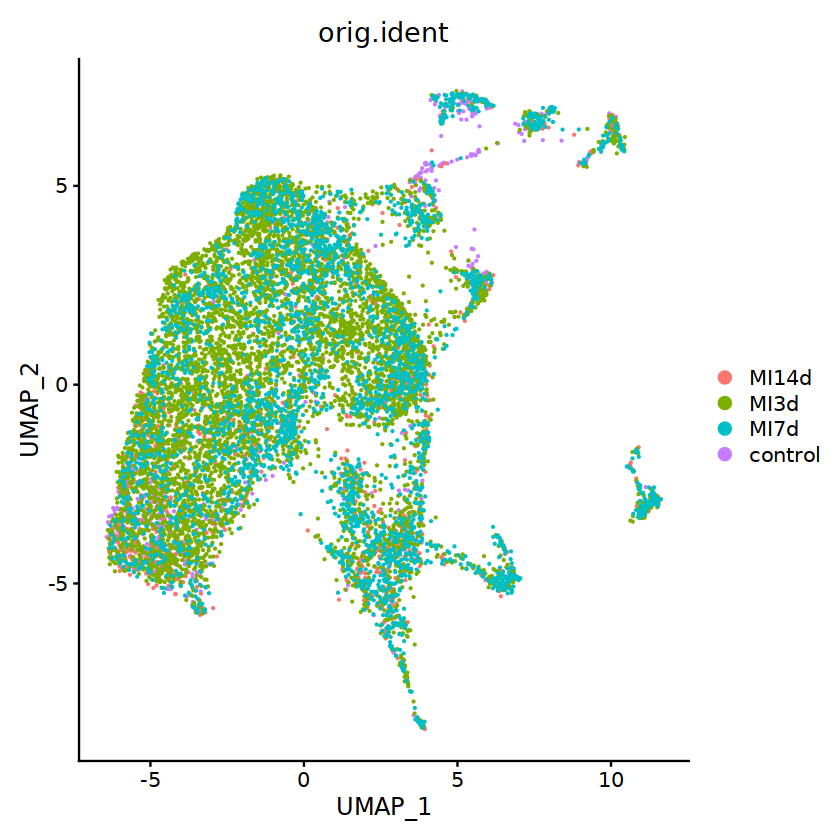

In [15]:
DimPlot(immune.combined,group.by = 'orig.ident')